In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jul-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-jul-2022/data.csv


# import libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# read data

In [3]:
df = pd.read_csv('/kaggle/input/tabular-playground-series-jul-2022/data.csv')

data_info = df.info()
data_head = df.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      98000 non-null  int64  
 1   f_00    98000 non-null  float64
 2   f_01    98000 non-null  float64
 3   f_02    98000 non-null  float64
 4   f_03    98000 non-null  float64
 5   f_04    98000 non-null  float64
 6   f_05    98000 non-null  float64
 7   f_06    98000 non-null  float64
 8   f_07    98000 non-null  int64  
 9   f_08    98000 non-null  int64  
 10  f_09    98000 non-null  int64  
 11  f_10    98000 non-null  int64  
 12  f_11    98000 non-null  int64  
 13  f_12    98000 non-null  int64  
 14  f_13    98000 non-null  int64  
 15  f_14    98000 non-null  float64
 16  f_15    98000 non-null  float64
 17  f_16    98000 non-null  float64
 18  f_17    98000 non-null  float64
 19  f_18    98000 non-null  float64
 20  f_19    98000 non-null  float64
 21  f_20    98000 non-null  float64
 22

(None,
    id      f_00      f_01      f_02      f_03      f_04      f_05      f_06  \
 0   0 -0.389420 -0.912791  0.648951  0.589045 -0.830817  0.733624  2.258560   
 1   1 -0.689249 -0.453954  0.654175  0.995248 -1.653020  0.863810 -0.090651   
 2   2  0.809079  0.324568 -1.170602 -0.624491  0.105448  0.783948  1.988301   
 3   3 -0.500923  0.229049  0.264109  0.231520  0.415012 -1.221269  0.138850   
 4   4 -0.671268 -1.039533 -0.270155 -1.830264 -0.290108 -1.852809  0.781898   
 
    f_07  f_08  ...      f_19      f_20      f_21      f_22      f_23  \
 0     2    13  ... -0.478412 -0.757002 -0.763635 -1.090369  1.142641   
 1     2     3  ... -0.428791 -0.089908 -1.784204 -0.839474  0.459685   
 2     5    11  ... -0.413534 -1.602377  1.190984  3.267116 -0.088322   
 3     6     2  ...  0.619283  1.287801  0.532837  1.036631 -2.041828   
 4     8     7  ... -1.628830 -0.434948  0.322505  0.284326 -2.438365   
 
        f_24      f_25      f_26      f_27      f_28  
 0 -0.884274  1.

In [4]:
df.shape

(98000, 30)

# ***visulize and clean***

In [5]:
descriptive_stats = df.describe()
missing_values = df.isnull().sum()

descriptive_stats, missing_values

(                 id          f_00          f_01          f_02          f_03  \
 count  98000.000000  98000.000000  98000.000000  98000.000000  98000.000000   
 mean   48999.500000      0.001220      0.005580     -0.001042     -0.000700   
 std    28290.307527      1.002801      1.000742      1.001373      1.000422   
 min        0.000000     -4.732235     -4.202795     -4.377021     -4.010826   
 25%    24499.750000     -0.675226     -0.670985     -0.672779     -0.672540   
 50%    48999.500000      0.002022      0.006650     -0.000324     -0.003185   
 75%    73499.250000      0.677271      0.677746      0.677086      0.672097   
 max    97999.000000      4.490521      4.324974      4.560247      4.399373   
 
                f_04          f_05          f_06          f_07          f_08  \
 count  98000.000000  98000.000000  98000.000000  98000.000000  98000.000000   
 mean      -0.003522     -0.001612     -0.003042      5.545918      6.763061   
 std        1.003061      1.000532    

# **histogram for each feature befor normalizaition **

**drop id column**

In [6]:
# Drop the 'id' column
df = df.drop('id', axis=1)

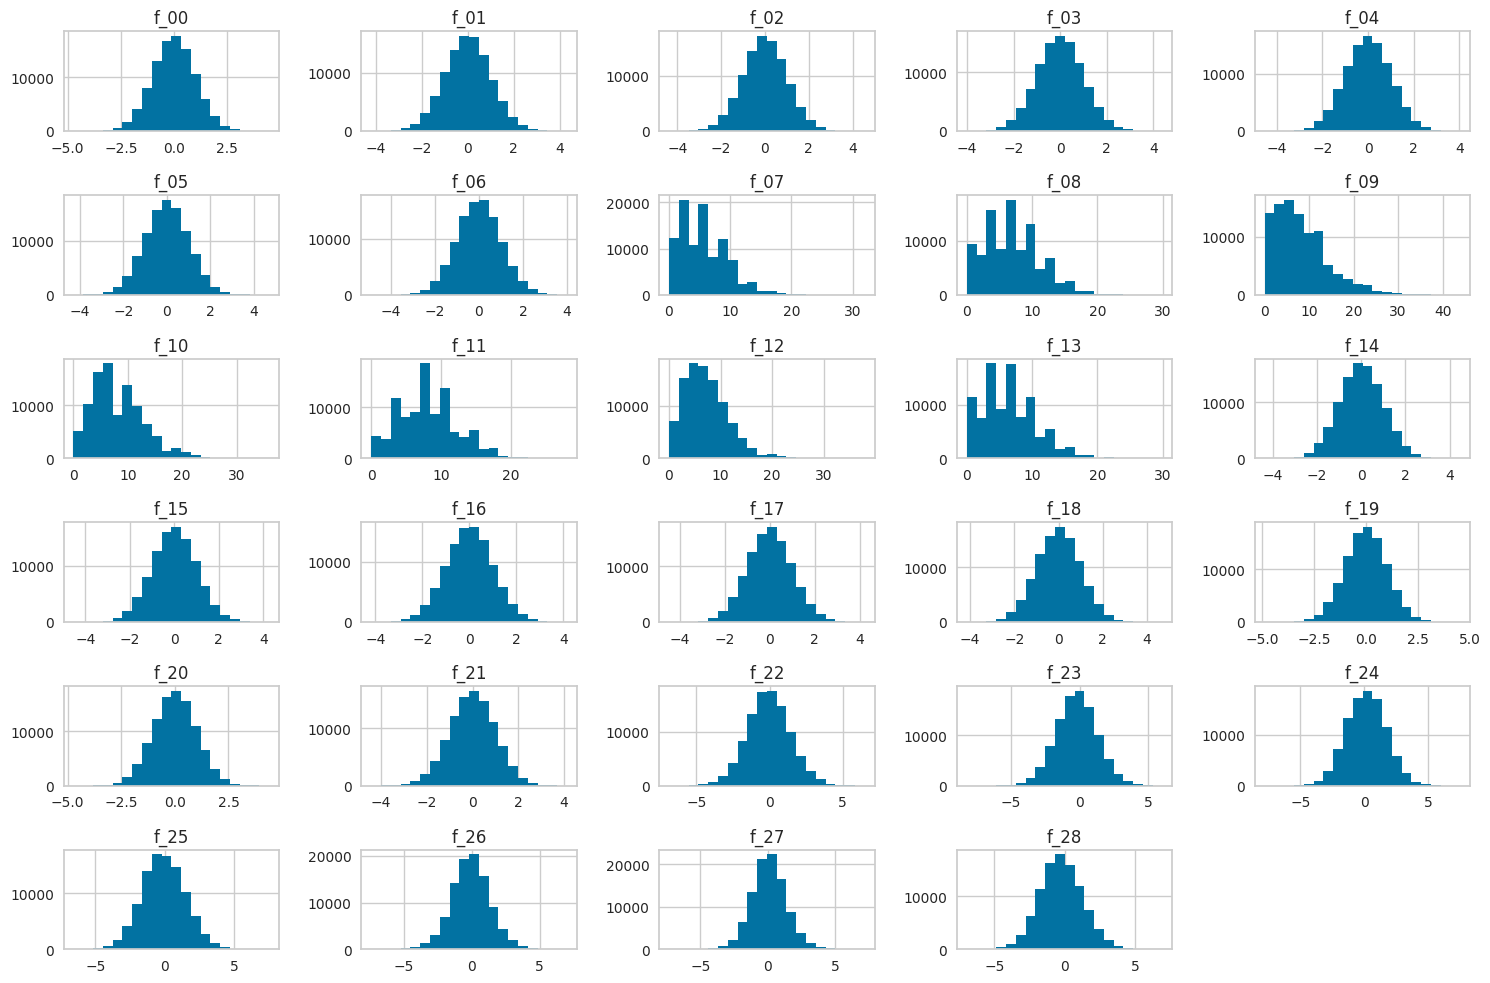

In [7]:
# Plot histograms for each feature
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()


# ****correlated features **********

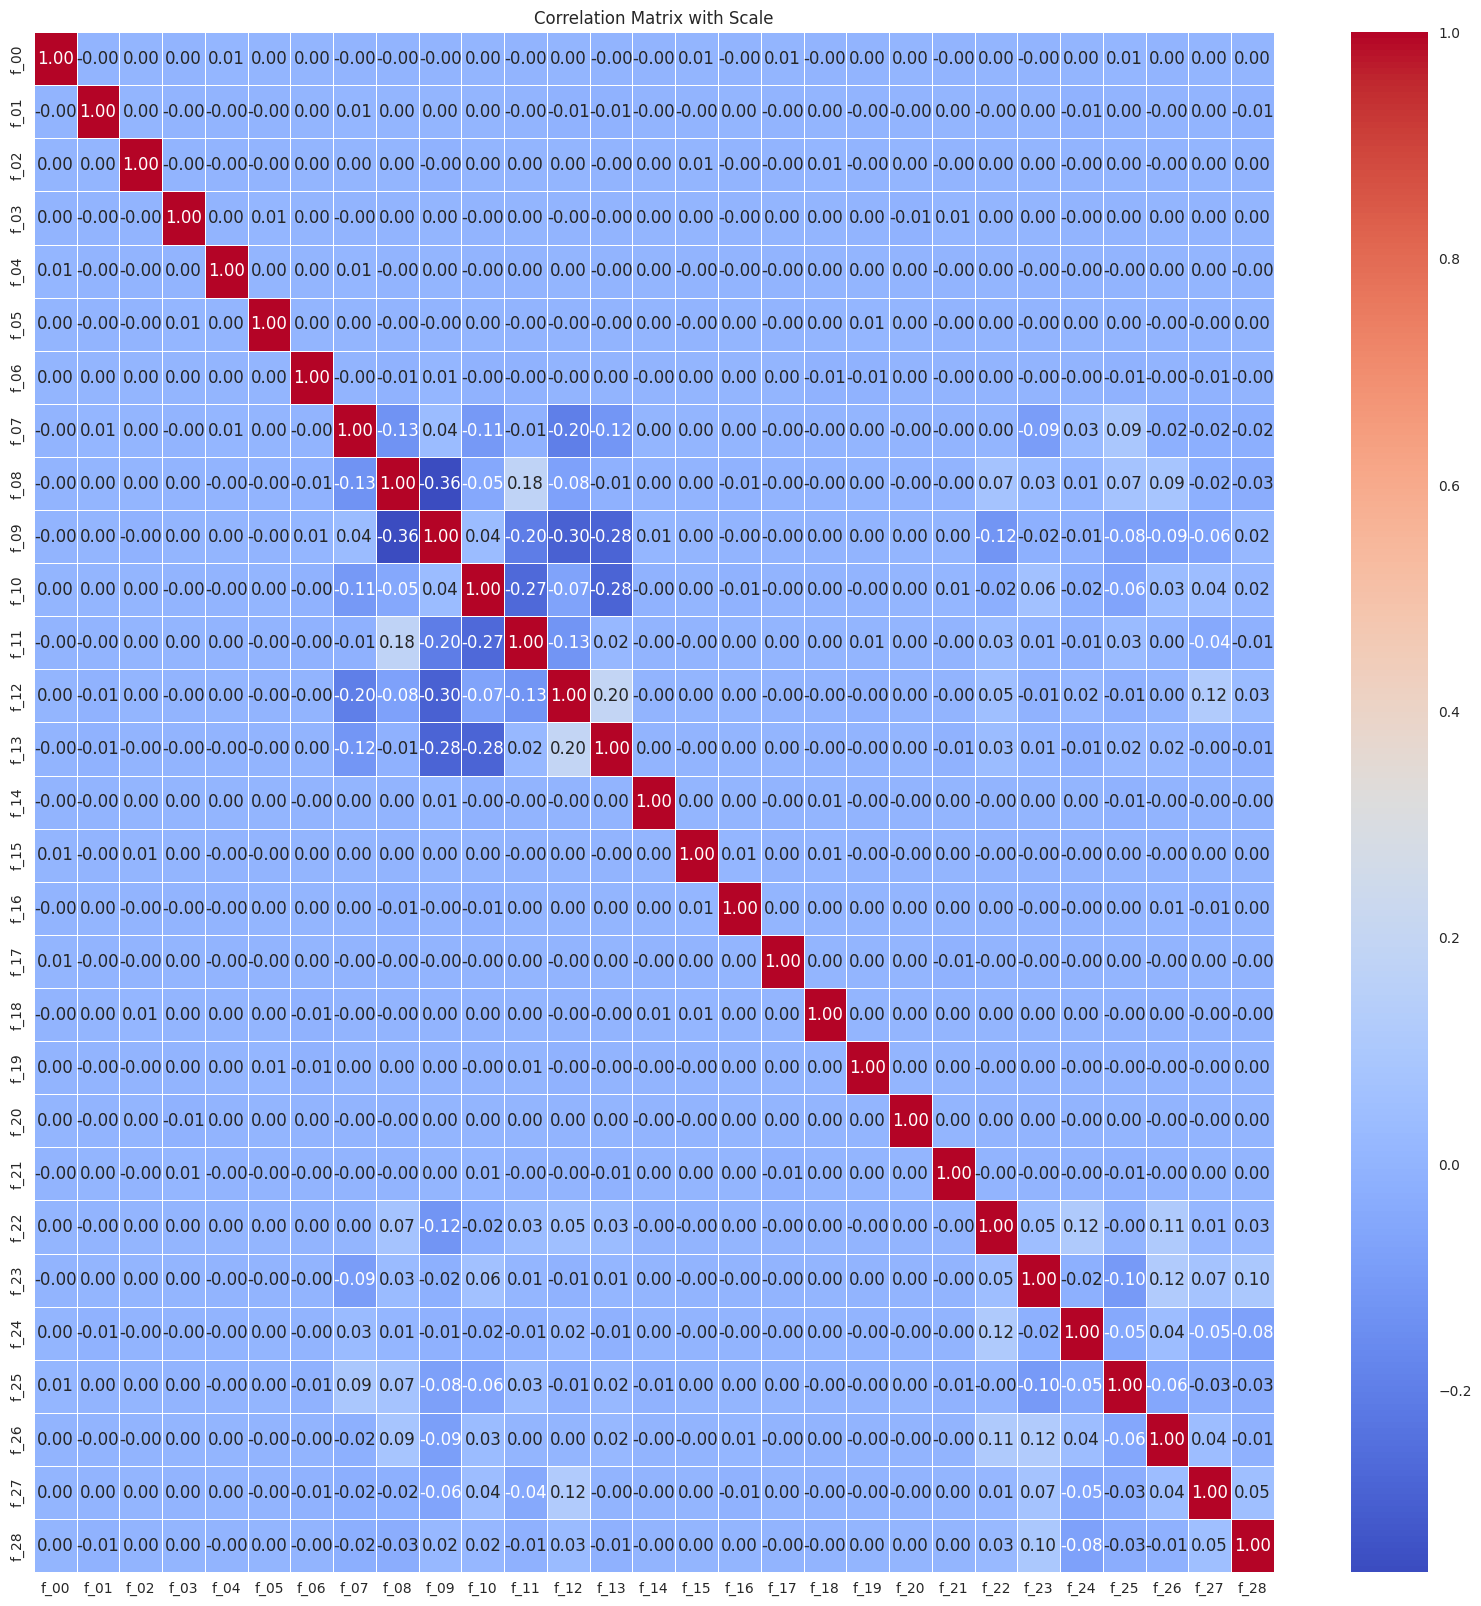

In [8]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Show the plot
plt.title('Correlation Matrix with Scale')
plt.show()

**features with high corelation**

In [9]:
# Set a correlation threshold (adjust as needed)
correlation_threshold = 0.2

# Find highly correlated feature pairs
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            pair = (colname_i, colname_j)
            highly_correlated_features.add(pair)

# Print the highly correlated feature pairs
print("Highly Correlated Feature Pairs:")
for pair in highly_correlated_features:
    print(pair)


Highly Correlated Feature Pairs:
('f_09', 'f_08')
('f_12', 'f_09')
('f_13', 'f_10')
('f_11', 'f_10')
('f_13', 'f_09')
('f_11', 'f_09')


# standerization****

In [10]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
df_standardized = scaler.fit_transform(df)

# Convert the standardized data back to a DataFrame (if needed)
df_standardized = pd.DataFrame(df_standardized, columns=df.columns)


# pca
dimentinality reduction and keep variance 



In [11]:

#pca_transformation
pca = PCA(n_components=min(df_standardized.shape))
principal_components = pca.fit_transform(df_standardized)
principal_components



array([[-7.19058135e-01, -1.84284477e-02, -1.01489775e+00, ...,
        -2.31225835e-01, -5.63228478e-01,  8.58196417e-01],
       [-1.01209813e+00, -9.20653984e-01,  1.88684735e+00, ...,
         7.67857388e-01, -5.61401389e-01, -2.76904394e-01],
       [-1.37061505e+00,  5.85541813e-01, -1.25720259e+00, ...,
        -8.17539989e-01,  1.32792974e-01,  1.75544189e-01],
       ...,
       [ 5.27246160e-01, -6.92976846e-01, -1.41440532e+00, ...,
        -4.57939378e-01, -7.80592486e-01, -2.63336714e-01],
       [ 5.87352923e-01, -1.18654312e+00, -1.25014778e-03, ...,
        -4.24776376e-01, -6.27282114e-01, -3.03575795e-02],
       [-1.67504885e+00, -5.86344582e-01,  3.84392187e-02, ...,
         1.42447148e+00, -1.77452830e-01,  3.56155395e-01]])

In [12]:
#Explained Variance Ratio:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
cumulative_explained_variance


array([0.06270482, 0.11301871, 0.15849873, 0.19862481, 0.23728464,
       0.27389417, 0.30909898, 0.34417689, 0.37922249, 0.41408223,
       0.44887732, 0.48349173, 0.5180389 , 0.55252544, 0.58694135,
       0.62128275, 0.6555482 , 0.68963221, 0.72360847, 0.75741177,
       0.79113585, 0.82403683, 0.85579202, 0.88472494, 0.91301555,
       0.94027526, 0.96534413, 0.98809719, 1.        ])

Visualization, helps you decide how many principal components to retain based on the amount of variance they explain.


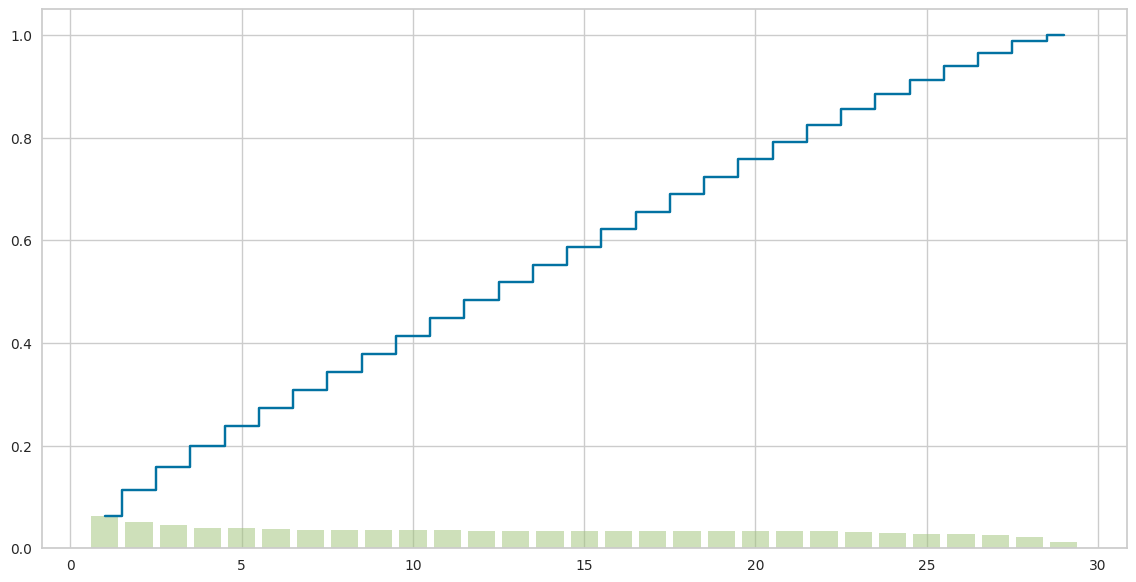

In [13]:
plt.figure(figsize=(14, 7))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center',
        label='Individual explained variance', color='g')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')


# **KElbowVisualizer**
k=6 

In [14]:
from yellowbrick.cluster import KElbowVisualizer

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

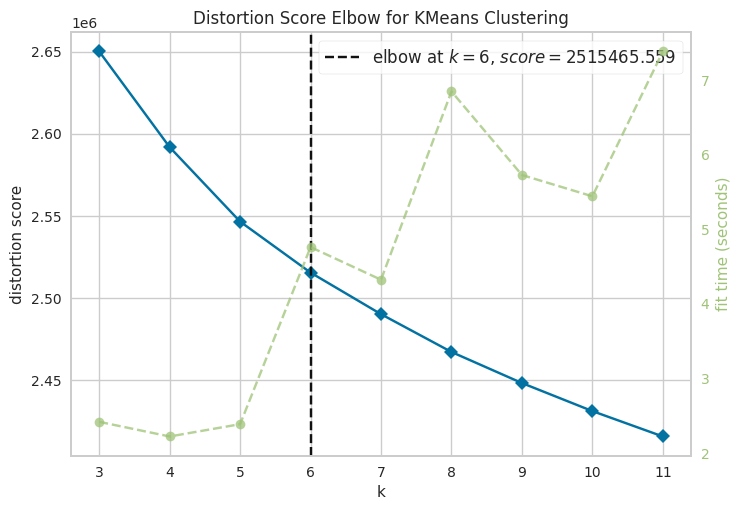

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12))

visualizer.fit(df_standardized)     
visualizer.show()

# Kmeans

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


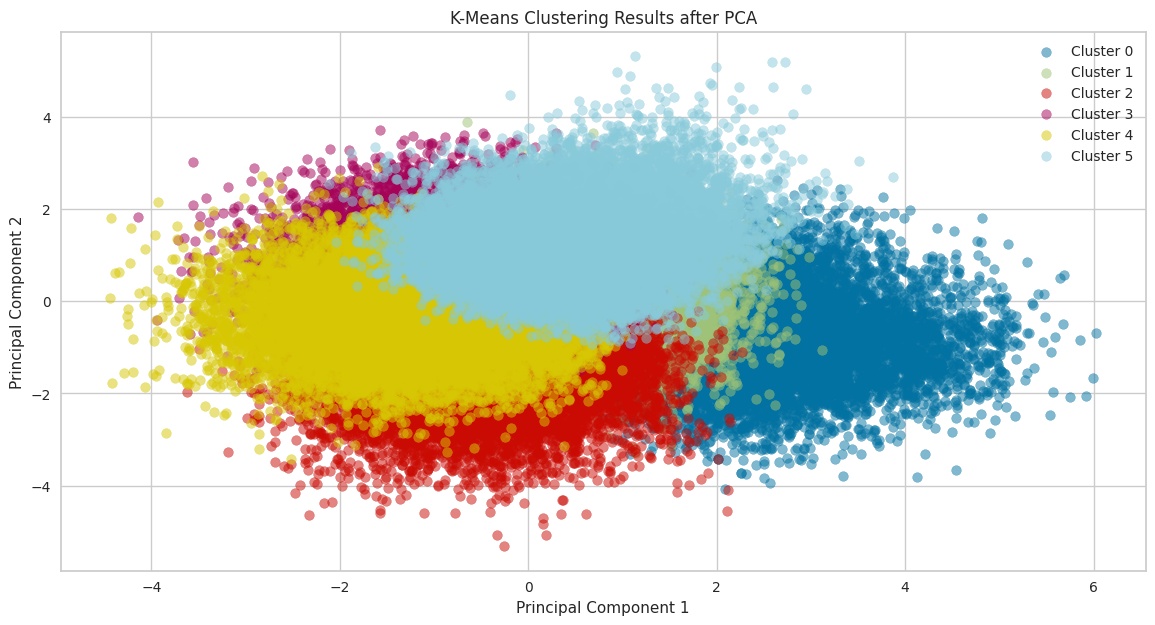

In [26]:
# Choose the number of clusters 
num_clusters = 6

# Apply K-Means clustering on the principal components
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(principal_components)

# Add the cluster labels to the original DataFrame
df['cluster_label'] = labels

# Scatter plot for all features after PCA
plt.figure(figsize=(14, 7))
for cluster in range(num_clusters):
    cluster_data = principal_components[labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}', alpha=0.5)

plt.title('K-Means Clustering Results after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


# **3D**

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


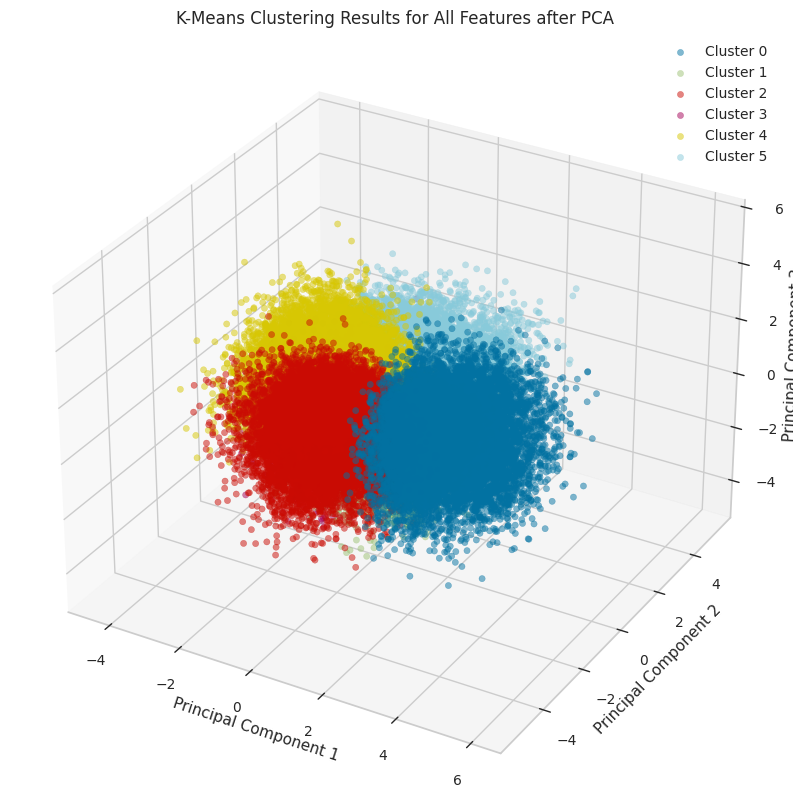

In [27]:
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA
num_components = min(df_standardized.shape)  # Choose the number of components based on your requirement
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(df_standardized)

# Choose the number of clusters (adjust as needed)
num_clusters = 6

# Apply K-Means clustering on the principal components
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(principal_components)

# Add the cluster labels to the original DataFrame
df['cluster_label'] = labels

# 3D Scatter plot for all features and clusters
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(num_clusters):
    cluster_data = principal_components[labels == cluster]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], label=f'Cluster {cluster}', alpha=0.5)

ax.set_title('K-Means Clustering Results for All Features after PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()


# **silhouette**
if silhoutte value is close to zero score indicates cluster overlapping 

In [28]:
km = KMeans(n_clusters=6, n_init=10, random_state=42)
clusters = km.fit_predict(df_standardized.iloc[:, 1:])

silhouette_avg = silhouette_score(df_standardized.iloc[:, 1:], clusters)

print("For n_clusters =", 6, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 6 The average silhouette_score is : 0.03571390443181461


In [30]:
# Create a DataFrame with 'Id' and 'Predicted' columns
submission_df = pd.DataFrame({'Id': range(len(labels)), 'Predicted': labels})

# Specify the directory on Kaggle where you want to save the file
kaggle_save_directory = '/kaggle/working'

# Save the DataFrame to a CSV file on Kaggle
submission_file = os.path.join(kaggle_save_directory, 'KMeans6str.csv')
submission_df.to_csv(submission_file, index=False)


# GMM

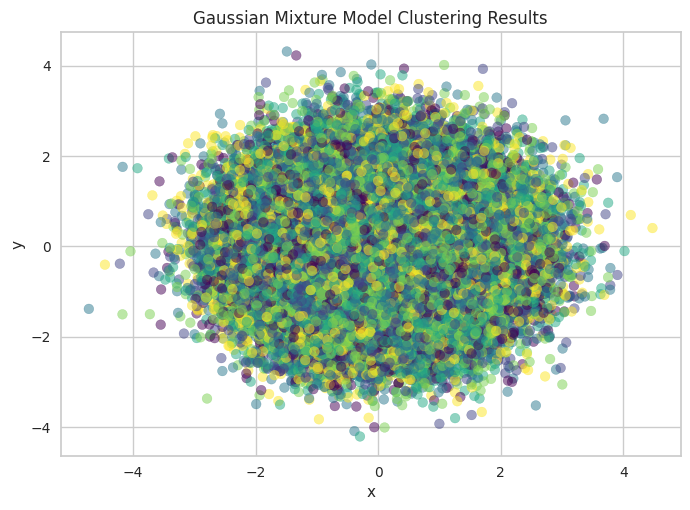

In [31]:
from sklearn.mixture import GaussianMixture

# Specify the number of clusters (adjust as needed)
num_clusters = 6

# Create a GMM model
gmm = GaussianMixture(n_components=num_clusters, random_state=42)

# Fit the model to the normalized data
gmm.fit(df_standardized)

# Predict the cluster labels
labels_gmm = gmm.predict(df_standardized)

# Visualize the clusters (using the first two components for simplicity)
plt.scatter(df_standardized.iloc[:, 0], df_standardized.iloc[:, 1], c=labels_gmm, cmap='viridis', alpha=0.5)
plt.title('Gaussian Mixture Model Clustering Results')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [32]:
# Create a DataFrame with 'Id' and 'Predicted' columns
submission_gmm = pd.DataFrame({'Id': range(len(labels_gmm)), 'Predicted': labels_gmm})

# Specify the directory on Kaggle where you want to save the file
kaggle_save_directory = '/kaggle/working'

# Save the DataFrame to a CSV file on Kaggle
submission_file = os.path.join(kaggle_save_directory, 'gmm22stn.csv')
submission_gmm.to_csv(submission_file, index=False)

# Mini Batch

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


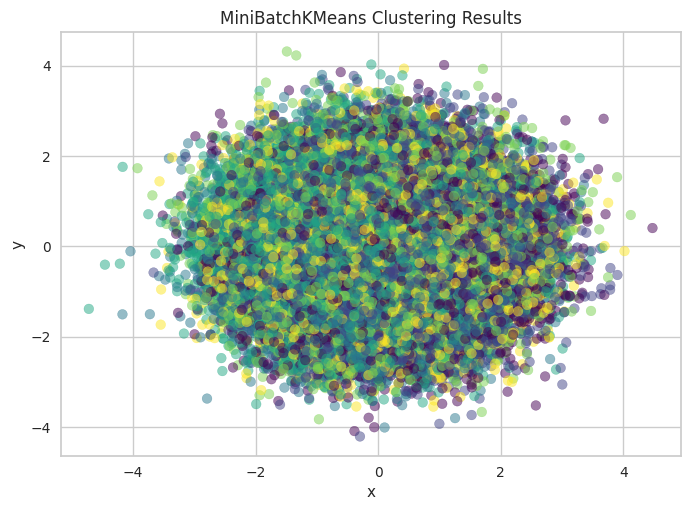

In [34]:
from sklearn.cluster import MiniBatchKMeans

# Specify the number of clusters
num_clusters_mini_batch_kmeans = 6

# Create a MiniBatchKMeans model
mini_batch_kmeans = MiniBatchKMeans(n_clusters=num_clusters_mini_batch_kmeans, random_state=42)

# Fit the model to the standardized data
labels_mini_batch_kmeans = mini_batch_kmeans.fit_predict(df_standardized)

# Visualize the clusters (using the first two components for simplicity)
plt.scatter(df_standardized.iloc[:, 0], df_standardized.iloc[:, 1], c=labels_mini_batch_kmeans, cmap='viridis', alpha=0.5)
plt.title('MiniBatchKMeans Clustering Results')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [35]:
# Create a DataFrame with 'Id' and 'Predicted' columns
submission_mini = pd.DataFrame({'Id': range(len(labels_mini_batch_kmeans)), 'Predicted': labels_mini_batch_kmeans})

# Specify the directory on Kaggle where you want to save the file
kaggle_save_directory = '/kaggle/working'

# Save the DataFrame to a CSV file on Kaggle
submission_file = os.path.join(kaggle_save_directory, 'minibatch2.csv')
submission_mini.to_csv(submission_file, index=False)

# Dbscan

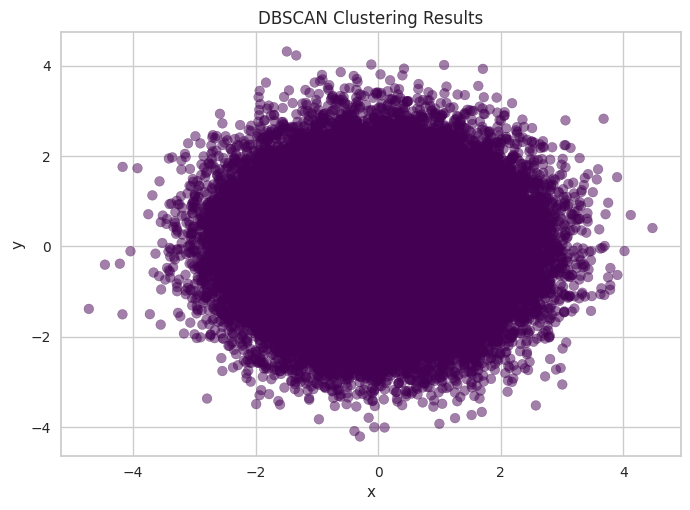

In [43]:
from sklearn.cluster import DBSCAN

# Create a DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model to the  data
labels_dbscan = dbscan.fit_predict(df_standardized)

# Visualize the clusters (using the first two components for simplicity)
plt.scatter(df_standardized.iloc[:, 0], df_standardized.iloc[:, 1], c=labels_dbscan, cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering Results')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [45]:
# Create a DataFrame with 'Id' and 'Predicted' columns
submission_dbscanstd = pd.DataFrame({'Id': range(len(labels_dbscan)), 'Predicted': labels_dbscan})

# Specify the directory on Kaggle where you want to save the file
kaggle_save_directory = '/kaggle/working'

# Save the DataFrame to a CSV file on Kaggle
submission_file = os.path.join(kaggle_save_directory, 'dbscan_std.csv')
submission_dbscanstd.to_csv(submission_file, index=False)